In [52]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from passwords import password 

In [53]:
engine = create_engine('postgresql+psycopg2://postgres:' + password + '@localhost:5432/SQL-Challenge2')
connection = engine.connect()

In [54]:
print(type(connection))

<class 'sqlalchemy.engine.base.Connection'>


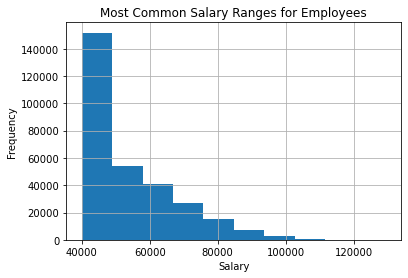

In [55]:
SQL_Query = pd.read_sql_query('select * from salaries', connection)
SQL_Query.describe()
SQL_Query.hist(column='salary')
plt.title("Most Common Salary Ranges for Employees")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

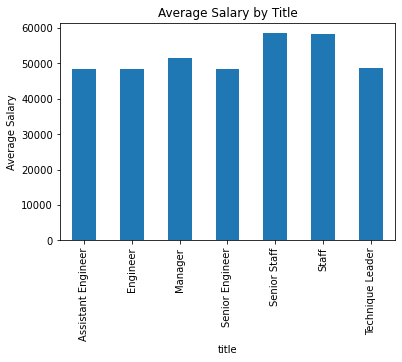

In [56]:
Second_Query = pd.read_sql_query('select s.salary, t.title from salaries as s join employees as e on (s.emp_no = e.emp_no) join titles as t on (e.emp_title_id = t.title_id)', connection)
Query_groupby_df = Second_Query.groupby(by='title').mean()
Query_groupby_df
Query_groupby_df.plot(kind='bar', legend=False)

plt.title("Average Salary by Title")
plt.ylabel("Average Salary")
plt.show()